<a href="https://colab.research.google.com/github/arwendy123/svr_model_fuelconsumption/blob/main/SVR_Model_for_Fuel_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVR Model for Fuel Consumption

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Download the Dataset

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2023-06-21 16:54:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.003s  

2023-06-21 16:54:22 (20.8 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Data Loading and Overview

In [3]:
# Load the dataset
df = pd.read_csv('/content/FuelConsumption.csv')

# Display general information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Display the summary statistics of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
None

## Target Variable Distribution

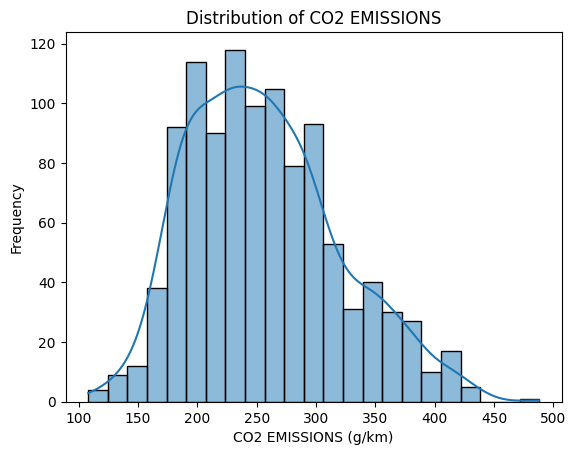

In [4]:
# Plot the distribution of the target variable
sns.histplot(df['CO2EMISSIONS'], kde=True)
plt.xlabel('CO2 EMISSIONS (g/km)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 EMISSIONS')
plt.show()


## Distribution of Numerical Features

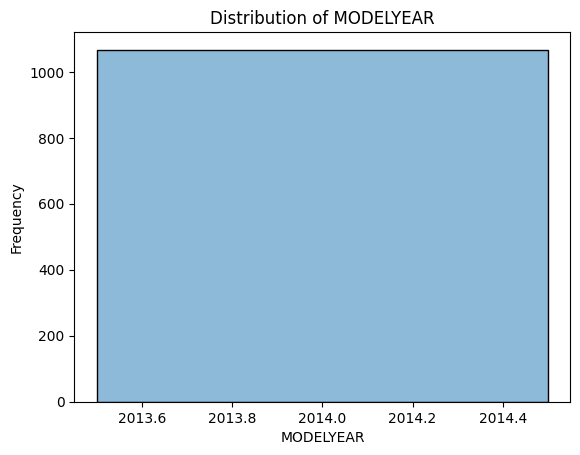

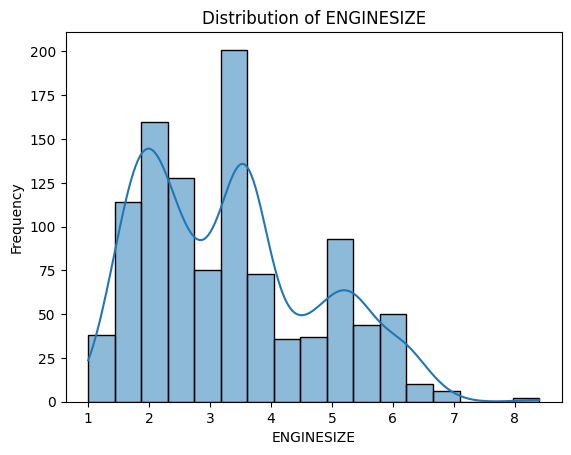

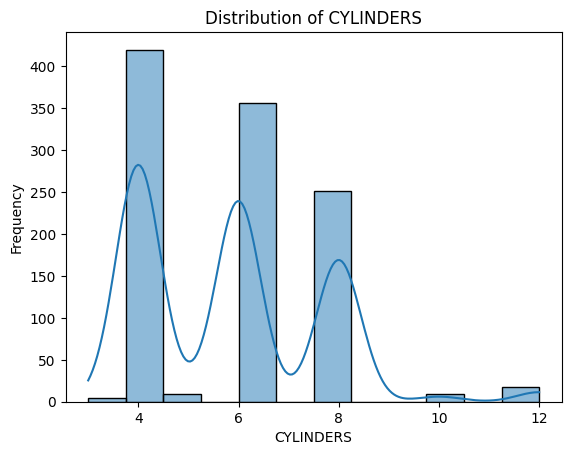

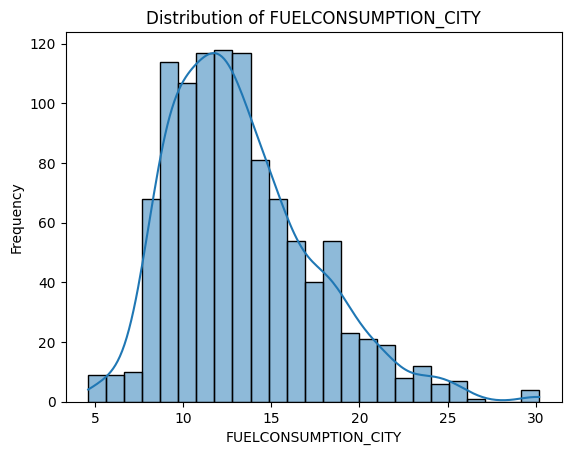

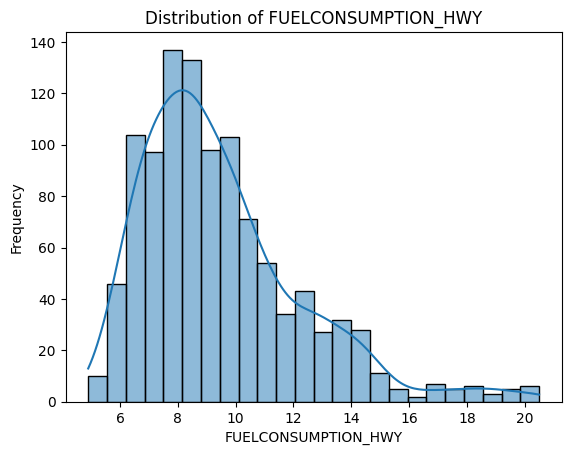

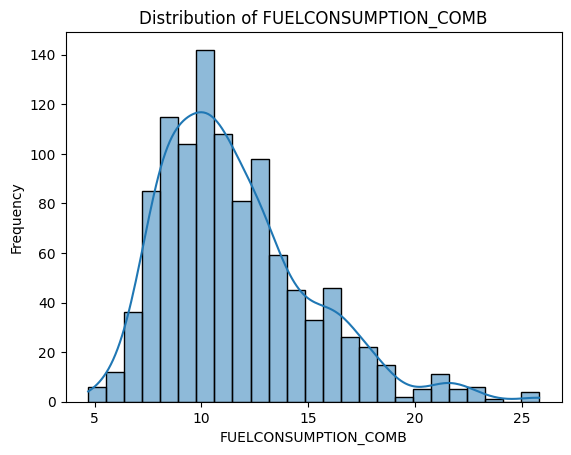

In [5]:
numerical_features = ['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
                      'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']

for feature in numerical_features:
    sns.histplot(df[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()


## Distribution of Categorical Features

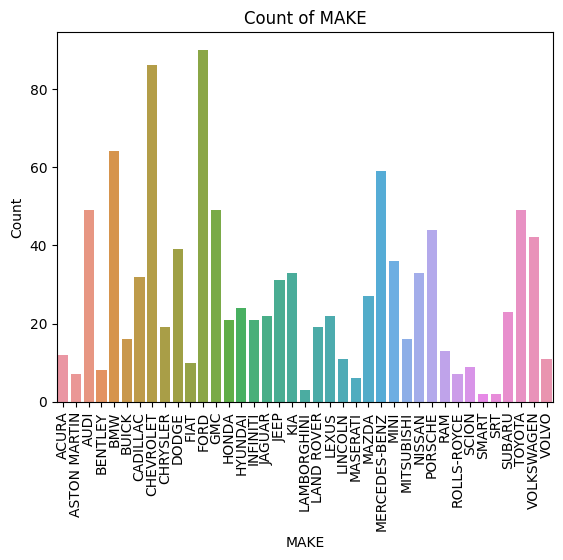

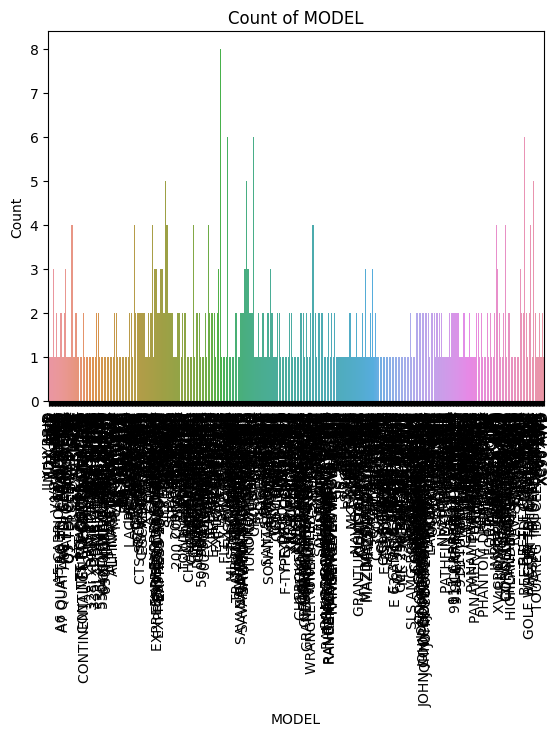

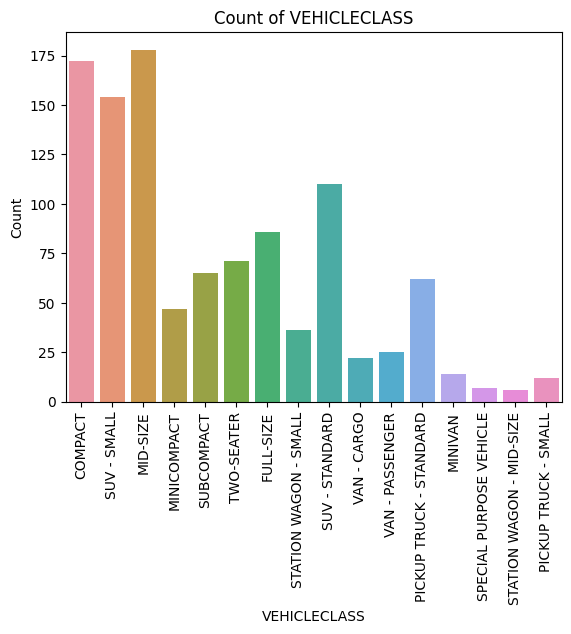

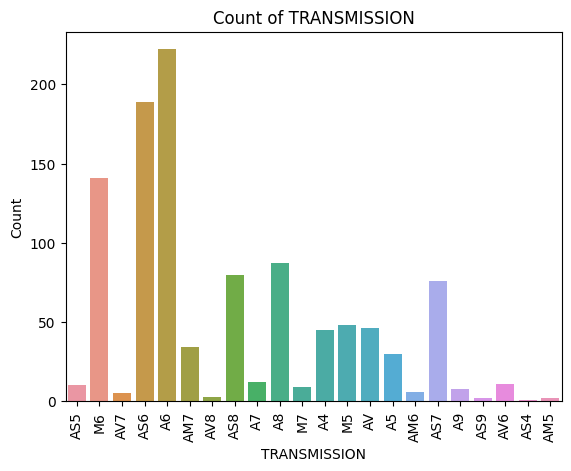

In [6]:
categorical_features = ['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION']

for feature in categorical_features:
    sns.countplot(data=df, x=feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=90)
    plt.show()


## Correlation Analysis of Numerical Features

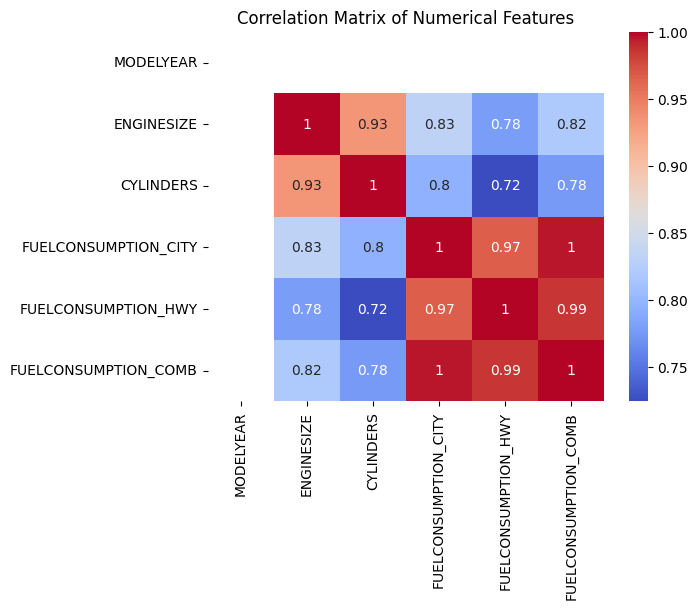

In [7]:
numerical_features = ['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
                      'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']

numerical_corr = df[numerical_features].corr()

sns.heatmap(numerical_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Scatter Plot of Highly Correlated Features with the Target

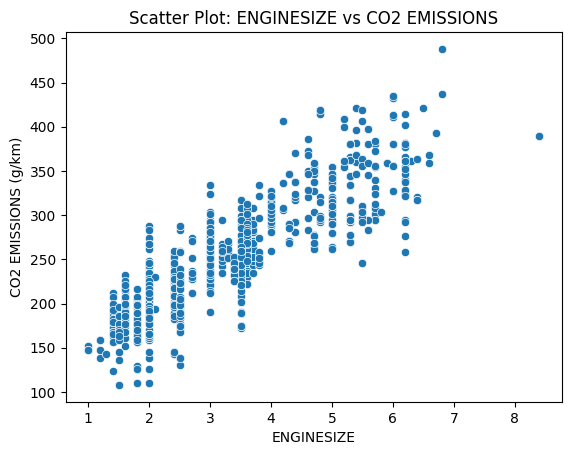

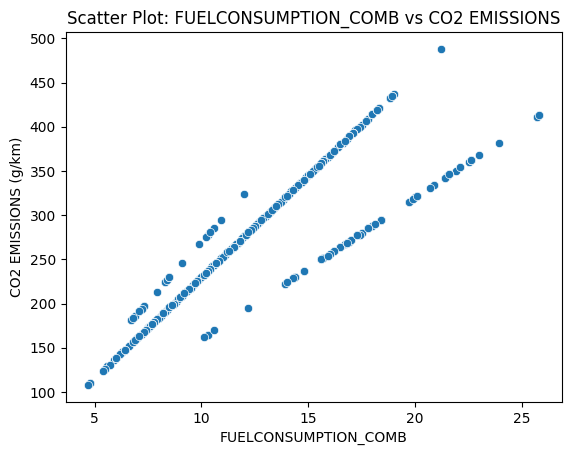

In [8]:
high_corr_features = ['ENGINESIZE', 'FUELCONSUMPTION_COMB']

for feature in high_corr_features:
    sns.scatterplot(data=df, x=feature, y='CO2EMISSIONS')
    plt.xlabel(feature)
    plt.ylabel('CO2 EMISSIONS (g/km)')
    plt.title(f'Scatter Plot: {feature} vs CO2 EMISSIONS')
    plt.show()


## Box Plot of Categorical Features with the Target

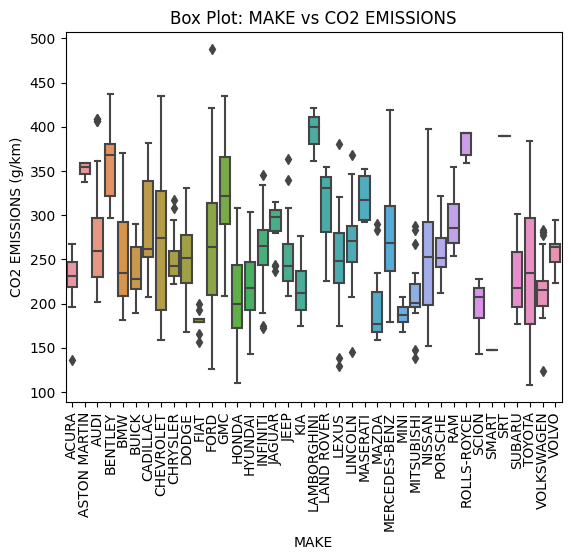

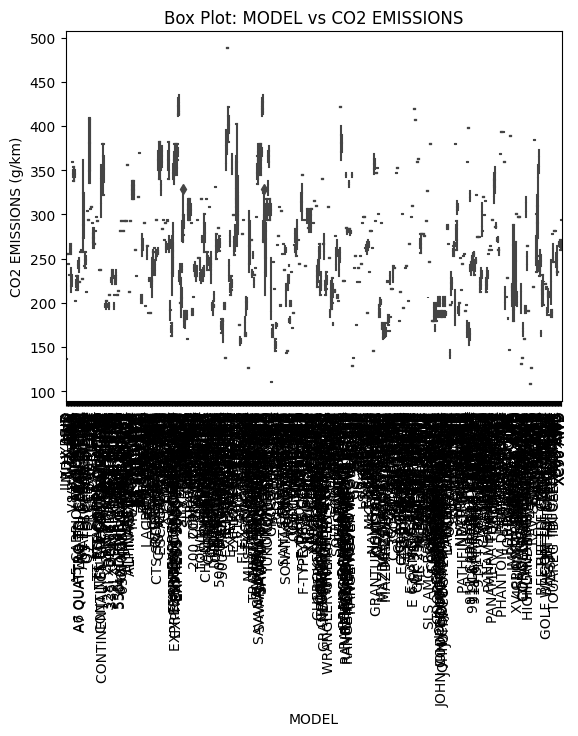

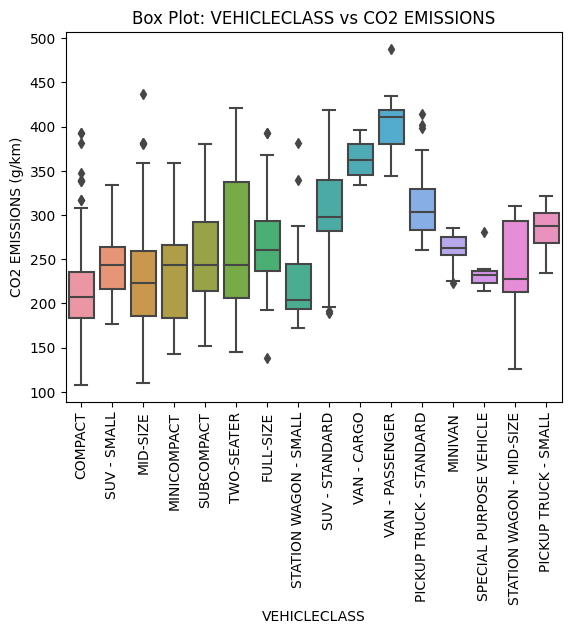

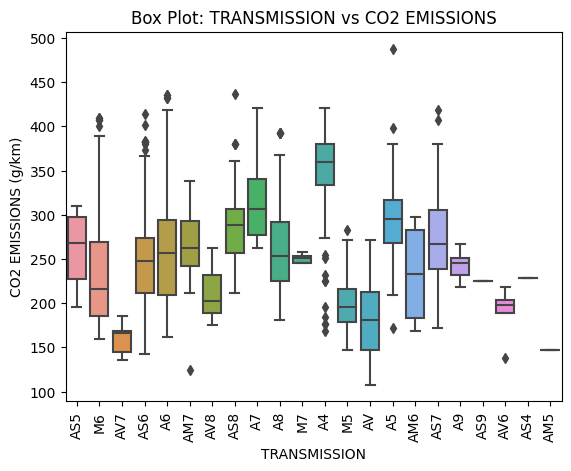

In [9]:
categorical_features = ['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION']

for feature in categorical_features:
    sns.boxplot(data=df, x=feature, y='CO2EMISSIONS')
    plt.xlabel(feature)
    plt.ylabel('CO2 EMISSIONS (g/km)')
    plt.title(f'Box Plot: {feature} vs CO2 EMISSIONS')
    plt.xticks(rotation=90)
    plt.show()


## Splitting the Data and Preparing Features and Target

In [10]:
# Split the data into features (X) and target variable (y)
X = df[['ENGINESIZE', 'FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

## Splitting the Data into Training and Testing Sets

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Creating and Training the SVR Model

In [12]:
# Create an SVR model
svr = SVR()

# Train the SVR model
svr.fit(X_train, y_train)


SVR()

## Making Predictions and Evaluating the Model

In [13]:
# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Mean Squared Error: 764.5690306386867
R2 Score: 0.8150957416209913
